In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
column_names = ["sex","length","diameter","height","whole weight","shucked weight","viscera weight","shell weight","rings"]
data = pd.read_csv("data.csv",sep=",",names=column_names)

In [23]:
gender_quantity = data['sex'].value_counts().reset_index()
gender_quantity.columns = [' ', 'count']

total_snails = gender_quantity['count'].sum()
gender_quantity['%'] = (gender_quantity['count'] / total_snails) * 100
gender_quantity['%'] = gender_quantity['%'].round(2)

category_counts = gender_quantity.sort_values(by=' ')


gender_quantity[' '] = gender_quantity[' '].replace({'M': 'MALE', 'I': 'INFANT', 'F': 'FEMALE'})

print(gender_quantity)

           count      %
0    MALE   1528  36.58
1  INFANT   1342  32.13
2  FEMALE   1307  31.29


In [24]:
import pandas as pd

column_names = ["sex", "length", "diameter", "height", "whole weight", "shucked weight", "viscera weight", "shell weight", "rings"]


data_rows = []

for variable in column_names[1:]:
    name = variable
    mean = data[variable].mean()
    std = data[variable].std()
    minimum = data[variable].min()
    q1 = data[variable].quantile(0.25)
    median = data[variable].median()
    q3 = data[variable].quantile(0.75)
    maximum = data[variable].max()
    data_rows.append([name, mean, std, minimum, q1, median, q3, maximum])


summary_stats = pd.DataFrame(data_rows, columns=[' ', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])

print(summary_stats)


                       mean       std     min     25%     50%     75%      max
0          length  0.523992  0.120093  0.0750  0.4500  0.5450   0.615   0.8150
1        diameter  0.407881  0.099240  0.0550  0.3500  0.4250   0.480   0.6500
2          height  0.139516  0.041827  0.0000  0.1150  0.1400   0.165   1.1300
3    whole weight  0.828742  0.490389  0.0020  0.4415  0.7995   1.153   2.8255
4  shucked weight  0.359367  0.221963  0.0010  0.1860  0.3360   0.502   1.4880
5  viscera weight  0.180594  0.109614  0.0005  0.0935  0.1710   0.253   0.7600
6    shell weight  0.238831  0.139203  0.0015  0.1300  0.2340   0.329   1.0050
7           rings  9.933684  3.224169  1.0000  8.0000  9.0000  11.000  29.0000


C:\Users\jstep\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jstep\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jstep\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


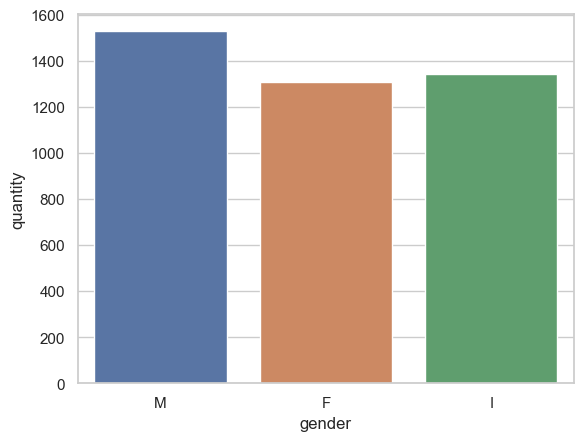

In [39]:
sns.countplot(data=data, x='sex')
plt.xlabel('gender')
plt.ylabel('quantity')
plt.show()

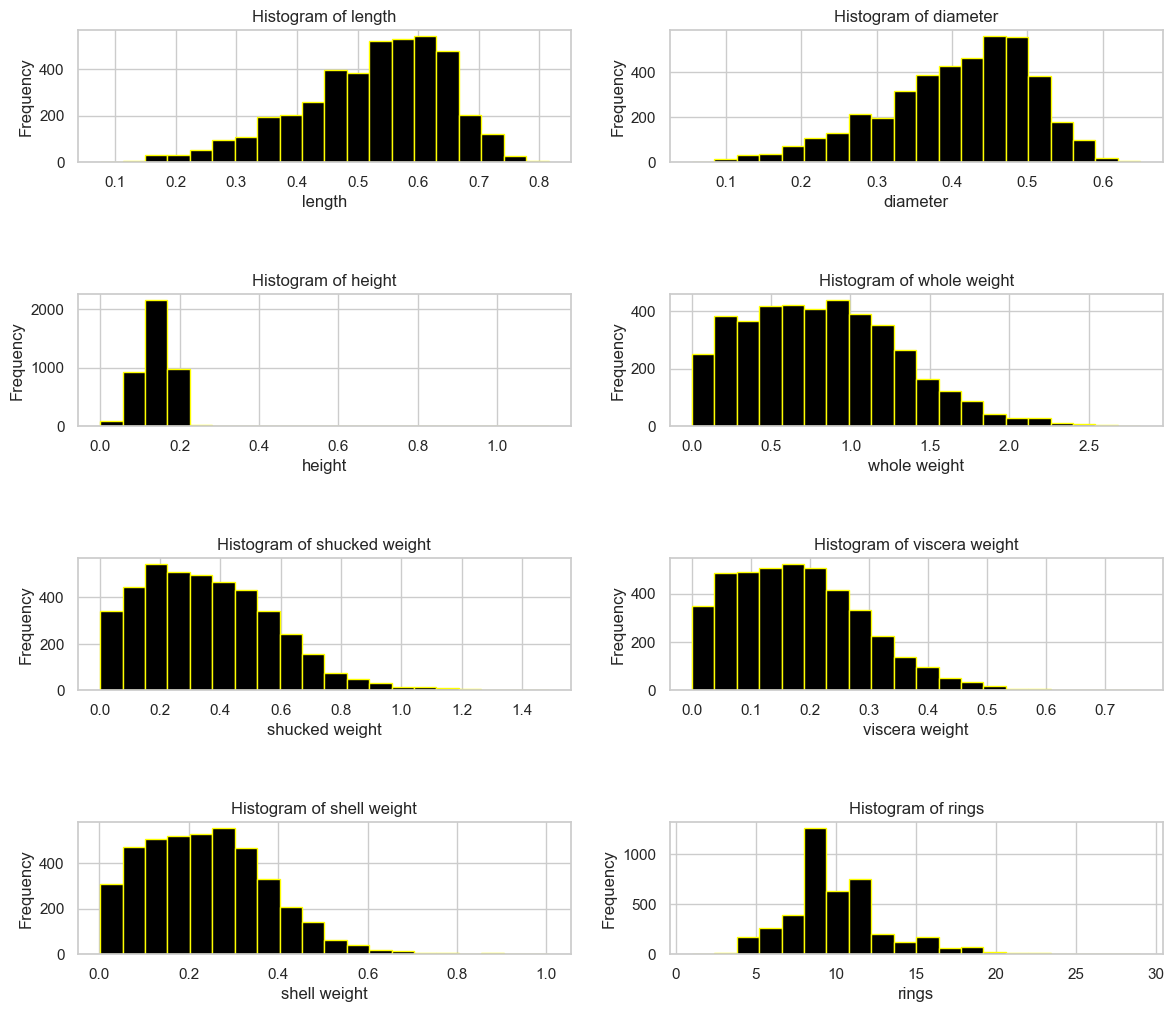

In [67]:
fig, plots = plt.subplots(4, 2, figsize=(14, 12))
fig.subplots_adjust(hspace=1)

i = 0
for variable in column_names[1:]:
    row = i // 2
    col = i % 2
    plots[row, col].hist(data[variable], bins=20, edgecolor='yellow', color='black')
    plots[row, col].set_title(f'Histogram of {variable}')
    plots[row, col].set_xlabel(variable)
    plots[row, col].set_ylabel('Frequency')
    i = i+1
plt.show()